# **Figures for 7/2 Presentation**

In [6]:
import os
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range")
warnings.filterwarnings("ignore", message="invalid value encountered in reduce")

import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt
from cftime import DatetimeNoLeap

%load_ext autoreload
%autoreload 2
import hmei.processing as pcs
import hmei.visualization as vis

In [22]:
## increase the resolution of figures in Juypter Notebook

# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 300
%matplotlib inline

# Import Data

In [14]:
writedir = '/home/bbuchovecky/storage/so_predict_derived/'
ctrl = 'CTRL/'

In [15]:
writedir = '/home/bbuchovecky/storage/so_predict_derived/'
ctrl = 'CTRL/'

def open_metric(var, metric, reg, time_scale):
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    ctrl = 'CTRL/'
    filename = var.lower()+'_ts_'+reg.lower()+'_'+time_scale.lower()+'_'+metric+'.nc'
    return xr.open_dataset(writedir+ctrl+var.upper()+'/'+filename)

In [16]:
sst_so_annual_mean = open_metric('sst', 'mean', 'so', 'annual')
sss_so_annual_mean = open_metric('sss', 'mean', 'so', 'annual')
pco2_so_annual_mean = open_metric('pco2surf', 'mean', 'so', 'annual')
npp_so_annual_mean = open_metric('npp', 'mean', 'so', 'annual')
cn_so_annual_mean = open_metric('cn_inv', 'mean', 'so', 'annual')
sie_so_annual_mean = open_metric('sie', 'mean', 'so', 'annual')
siv_so_annual_mean = open_metric('siv', 'mean', 'so', 'annual')
mld_so_annual_mean = open_metric('mld', 'mean', 'so', 'annual')

In [17]:
sst_so_monthly_anom = open_metric('sst', 'anom', 'so', 'monthly')
sss_so_monthly_anom = open_metric('sss', 'anom', 'so', 'monthly')
pco2_so_monthly_anom = open_metric('pco2surf', 'anom', 'so', 'monthly')
npp_so_monthly_anom = open_metric('npp', 'anom', 'so', 'monthly')
cn_so_monthly_anom = open_metric('cn_inv', 'anom', 'so', 'monthly')
sie_so_monthly_anom = open_metric('sie', 'anom', 'so', 'monthly')
siv_so_monthly_anom = open_metric('siv', 'anom', 'so', 'monthly')
mld_so_monthly_anom = open_metric('mld', 'anom', 'so', 'monthly')

In [18]:
sst_so_monthly_var = open_metric('sst', 'var', 'so', 'monthly')
sss_so_monthly_var = open_metric('sss', 'var', 'so', 'monthly')
pco2_so_monthly_var = open_metric('pco2surf', 'var', 'so', 'monthly')
npp_so_monthly_var = open_metric('npp', 'var', 'so', 'monthly')
cn_so_monthly_var = open_metric('cn_inv', 'var', 'so', 'monthly')
sie_so_monthly_var = open_metric('sie', 'var', 'so', 'monthly')
siv_so_monthly_var = open_metric('siv', 'var', 'so', 'monthly')
mld_so_monthly_var = open_metric('mld', 'var', 'so', 'monthly')

# Figure 1a

In [228]:
def entire_ctrl_ens(var, reg, size=(8,4)):
    
    if reg.lower() == 'global':
        ctrl = xr.open_dataset(writedir+'CTRL/'+var.upper()+'/'+var.lower()+'_ts_global_annual_mean.nc')['Global']
        ens = xr.open_dataset(writedir+var.upper()+'_ENSEMBLE/'+var.lower()+'_ens_global_annual_mean.nc')['Global']
    
    else:
        ctrl = xr.open_dataset(writedir+'CTRL/'+var.upper()+'/'+var.lower()+'_ts_so_annual_mean.nc')[reg]
        ens = xr.open_dataset(writedir+var.upper()+'_ENSEMBLE/'+var.lower()+'_ens_so_annual_mean.nc')[reg]

#     color = 'red'
#     if reg.lower() != 'global' and reg.lower() != 'southernocean':
#         reg_masks = xr.open_dataset(write_rootdir+'regional_global_masks.nc')
#         cmap = ['black', 'red', 'blue', 'green', 'orange', 'magenta']
#         color = cmap[list(reg_masks.data_vars).index(reg)]
    
    ens_yrs = np.array([22,64,106,170,232,295])

    fig,ax = plt.subplots(figsize=size)
    ax.plot(np.arange(1,301), ctrl, color='k');

    for nS in range(6):
        yr = int(str(ens['nStart'][nS].values).split('_')[0][1:])
        for e in range(40):
            if var.lower() == 'sst':
                ax.plot(yr+np.arange(10), ens[nS,e]-273.15, color='red', linewidth=0.75)
            else:
                ax.plot(yr+np.arange(10), ens[nS,e], color='red', linewidth=0.75)

    ax.set(xlim=[1,304], xticks=ens_yrs, xticklabels=ens_yrs, xlabel='Time (yr)');
    ax.set_title(reg+' Mean '+var.upper())
    
    return fig,ax

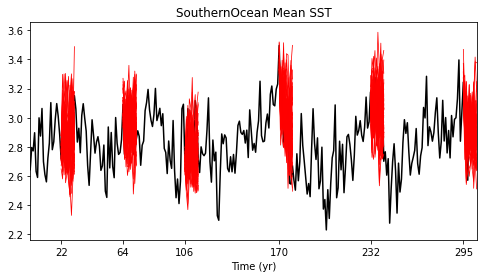

In [229]:
fig,ax = entire_ctrl_ens('sst', 'SouthernOcean')
# ax.set(title='AmundBell Mean Sea Surface Temperature', ylabel='Sea surface temperature ($^{\circ}$C)');

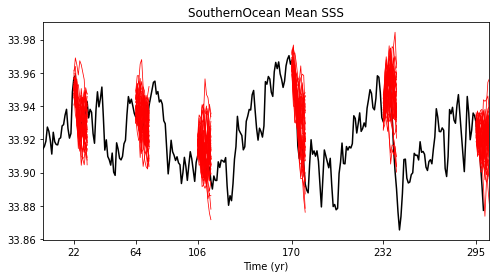

In [230]:
fig,ax = entire_ctrl_ens('sss', 'SouthernOcean')

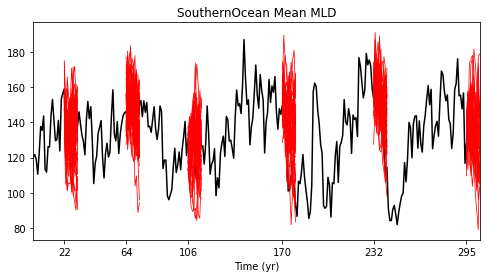

In [231]:
fig,ax = entire_ctrl_ens('mld', 'SouthernOcean')

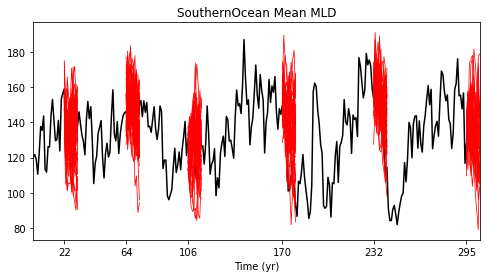

In [232]:
fig,ax = entire_ctrl_ens('mld', 'SouthernOcean')

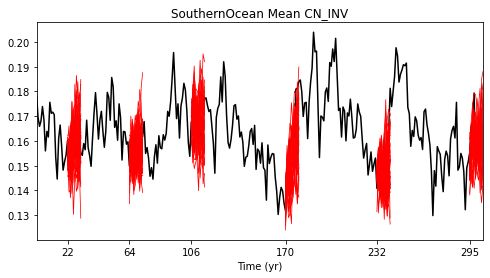

In [233]:
fig,ax = entire_ctrl_ens('cn_inv', 'SouthernOcean')

# Divergence Plots

In [242]:
num_plots = 1

In [234]:
def div_ens_plot(var, reg, iS, size=(8,4)):
    ens_yrs = np.array([170,22,64,106,232,295])

    if reg.lower() == 'global':
        ctrl = xr.open_datasett(writedir+'CTRL/'+var.upper()+'/'+var.lower()+'_ts_global_monthly_anom.nc')['Global']
        if iS == 5:
            ctrl = ctrl.isel(month=np.arange(ens_yrs[iS]*12, (ens_yrs[iS]*12)+60))
        else:
            ctrl = ctrl.isel(month=np.arange(ens_yrs[iS]*12, (ens_yrs[iS]*12)+120))
        ens = xr.open_dataset(writedir+var.upper()+'_ENSEMBLE/'+var.lower()+'_ens_global_monthly_anom.nc')['Global']
    
    else:
        ctrl = xr.open_dataset(writedir+'CTRL/'+var.upper()+'/'+var.lower()+'_ts_so_monthly_anom.nc')[reg]
        if iS == 5:
            ctrl = ctrl.isel(month=np.arange(ens_yrs[iS]*12, (ens_yrs[iS]*12)+60))
        else:
            ctrl = ctrl.isel(month=np.arange(ens_yrs[iS]*12, (ens_yrs[iS]*12)+120))
        ens = xr.open_dataset(writedir+var.upper()+'_ENSEMBLE/'+var.lower()+'_ens_so_monthly_anom.nc')[reg]
        
    fig,ax = plt.subplots(figsize=size)

    for e in range(40):
        if e == 0:
            ax.plot(ens['nT'], ens[iS,e], color='red', linewidth=0.75, label='Ensemble Members')
        else:
            ax.plot(ens['nT'], ens[iS,e], color='red', linewidth=0.75)
        
    ax.plot(np.arange(1,ctrl.size+1), ctrl, color='k', label='Control')

    ylim = abs(np.array(ax.get_ylim())).max()
    ax.set(xlim=[1,120], ylim=[-ylim,ylim], xticks=[1,60,120], xticklabels=[ens_yrs[iS], ens_yrs[iS]+5, ens_yrs[iS]+10]);
    ax.set(xlabel='Time (yr)', title=var.upper()+' ENS'+f'{iS+1:02}');
    
    leg = ax.legend(loc='lower left');
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    
    return fig,ax

## SST

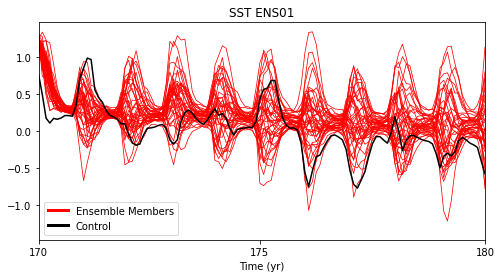

In [243]:
for i in range(num_plots):
    fig,ax = div_ens_plot('sst', 'SouthernOcean', i)

## SSS

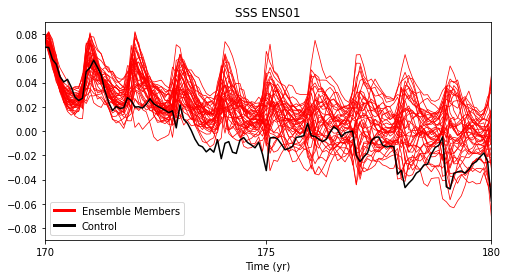

In [244]:
for i in range(num_plots):
    fig,ax = div_ens_plot('sss', 'SouthernOcean', i)

## NPP

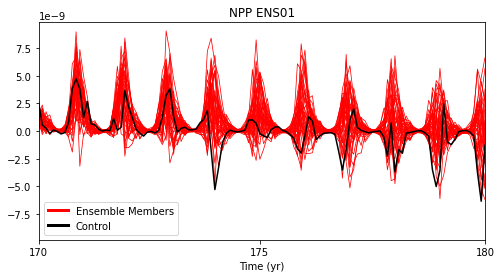

In [245]:
for i in range(num_plots):
    fig,ax = div_ens_plot('npp', 'SouthernOcean', i)

## MLD

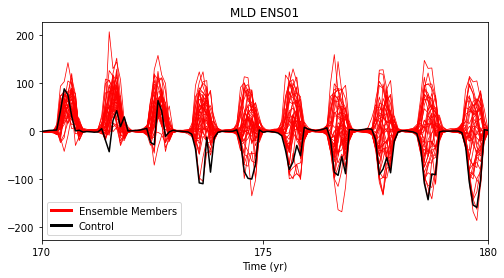

In [246]:
for i in range(num_plots):
    fig,ax = div_ens_plot('mld', 'SouthernOcean', i)

## PCO2SURF

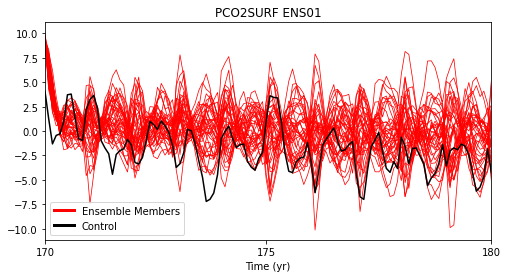

In [247]:
for i in range(num_plots):
    fig,ax = div_ens_plot('pco2surf', 'SouthernOcean', i)

## SIE**

**Need to re-examine computations for ensemble anomalies!!**

In [239]:
# for i in range(6):
#     fig,ax = div_ens_plot('sie', 'SouthernOcean', i)

# Variance Plots

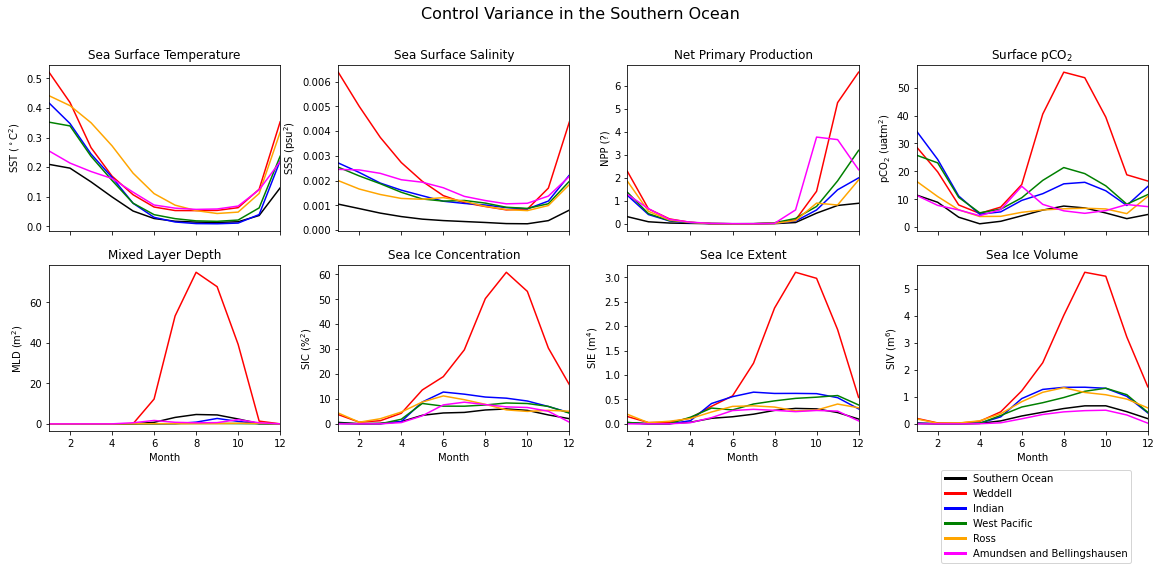

In [151]:
reg_masks = xr.open_dataset(write_rootdir+'regional_global_masks.nc')

size = (16,8)

fig,axes = plt.subplots(2, 4, figsize=size, sharex=True)

xlim=[1,12]
cmap = ['black', 'red', 'blue', 'green', 'orange', 'magenta']

all_data = [sst_so_monthly_var, sss_so_monthly_var, npp_so_monthly_var*1e17,
           pco2_so_monthly_var, mld_so_monthly_var/1000, cn_so_monthly_var*10000,
           sie_so_monthly_var/1e17,siv_so_monthly_var/1e16]

for f in range(8):
    for (reg,i) in zip(reg_masks.data_vars, range(6)):
#         if reg != 'Weddell':
        axes[int(f/4),f%4].plot(all_data[f]['month'], all_data[f][reg], color=cmap[i], label=reg_masks[reg].attrs['long_name'])
        axes[int(f/4),f%4].set(xlim=xlim, title=all_data[f].name.split('_')[0])
        
        if int(f/4) == 1:
            axes[int(f/4),f%4].set(xlabel='Month')

axes[0,0].set(title='Sea Surface Temperature', ylabel='SST ($^\circ$C$^2$)');
axes[0,1].set(title='Sea Surface Salinity', ylabel='SSS (psu$^2$)');
axes[0,2].set(title='Net Primary Production', ylabel='NPP (?)');
axes[0,3].set(title='Surface pCO$_2$', ylabel='pCO$_2$ (uatm$^2$)');
axes[1,0].set(title='Mixed Layer Depth', ylabel='MLD (m$^2$)');
axes[1,1].set(title='Sea Ice Concentration', ylabel='SIC (%$^2$)');
axes[1,2].set(title='Sea Ice Extent', ylabel='SIE (m$^4$)');
axes[1,3].set(title='Sea Ice Volume', ylabel='SIV (m$^6$)');

leg = axes[1,3].legend(bbox_to_anchor = (0.95, -0.2));
for line in leg.get_lines():
    line.set_linewidth(3.0)

fig.suptitle('Control Variance in the Southern Ocean', fontsize=16);

fig.tight_layout(pad=0.25)
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(top=0.88)

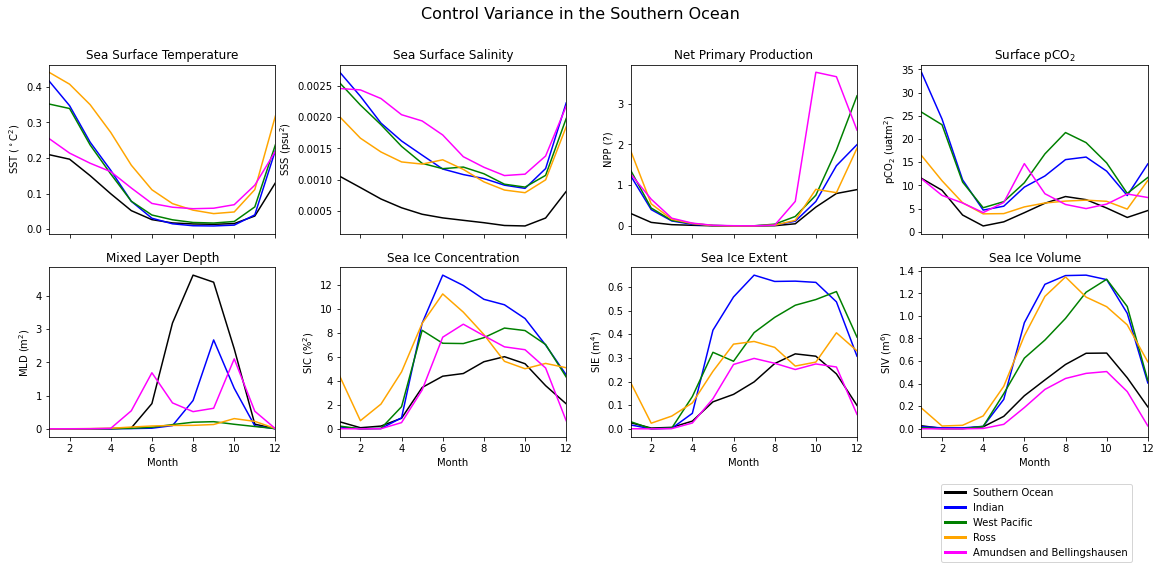

In [144]:
reg_masks = xr.open_dataset(write_rootdir+'regional_global_masks.nc')

size = (16,8)

fig,axes = plt.subplots(2, 4, figsize=size, sharex=True)

xlim=[1,12]
cmap = ['black', 'red', 'blue', 'green', 'orange', 'magenta']

all_data = [sst_so_monthly_var, sss_so_monthly_var, npp_so_monthly_var*1e17,
           pco2_so_monthly_var, mld_so_monthly_var/1000, cn_so_monthly_var*10000,
           sie_so_monthly_var/1e17,siv_so_monthly_var/1e16]

for f in range(8):
    for (reg,i) in zip(reg_masks.data_vars, range(6)):
        if reg != 'Weddell':
            axes[int(f/4),f%4].plot(all_data[f]['month'], all_data[f][reg], color=cmap[i], label=reg_masks[reg].attrs['long_name'])
            axes[int(f/4),f%4].set(xlim=xlim, title=all_data[f].name.split('_')[0])
        
        if int(f/4) == 1:
            axes[int(f/4),f%4].set(xlabel='Month')

axes[0,0].set(title='Sea Surface Temperature', ylabel='SST ($^\circ$C$^2$)');
axes[0,1].set(title='Sea Surface Salinity', ylabel='SSS (psu$^2$)');
axes[0,2].set(title='Net Primary Production', ylabel='NPP (?)');
axes[0,3].set(title='Surface pCO$_2$', ylabel='pCO$_2$ (uatm$^2$)');
axes[1,0].set(title='Mixed Layer Depth', ylabel='MLD (m$^2$)');
axes[1,1].set(title='Sea Ice Concentration', ylabel='SIC (%$^2$)');
axes[1,2].set(title='Sea Ice Extent', ylabel='SIE (m$^4$)');
axes[1,3].set(title='Sea Ice Volume', ylabel='SIV (m$^6$)');

leg = axes[1,3].legend(bbox_to_anchor = (0.95, -0.25));
for line in leg.get_lines():
    line.set_linewidth(3.0)

fig.suptitle('Control Variance in the Southern Ocean', fontsize=16);

fig.tight_layout(pad=0.25)
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(top=0.88)

# Std Dev Plots

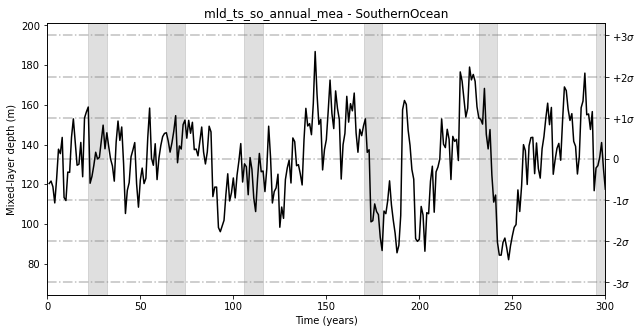

In [252]:
vis.stdev_plot(mld_so_annual_mean, 'SouthernOcean');

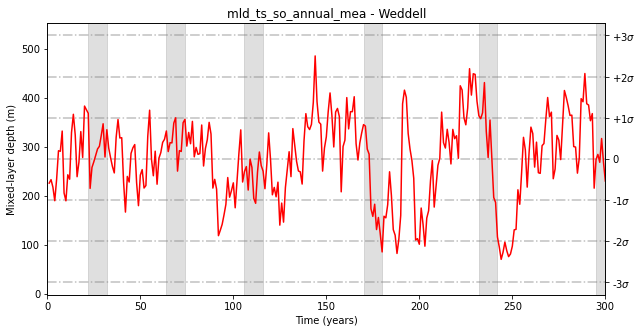

In [254]:
vis.stdev_plot(mld_so_annual_mean, 'Weddell');

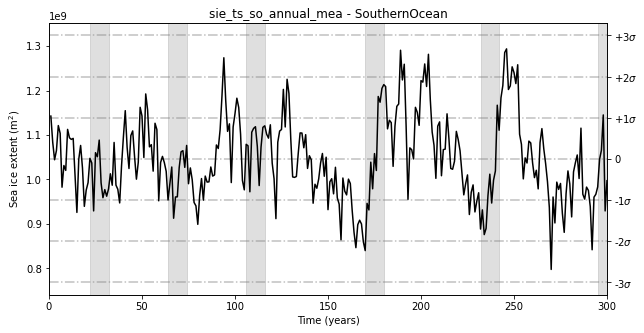

In [255]:
vis.stdev_plot(sie_so_annual_mean, 'SouthernOcean');

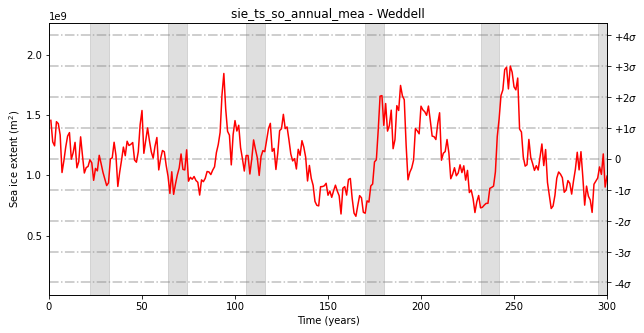

In [257]:
vis.stdev_plot(sie_so_annual_mean, 'Weddell');

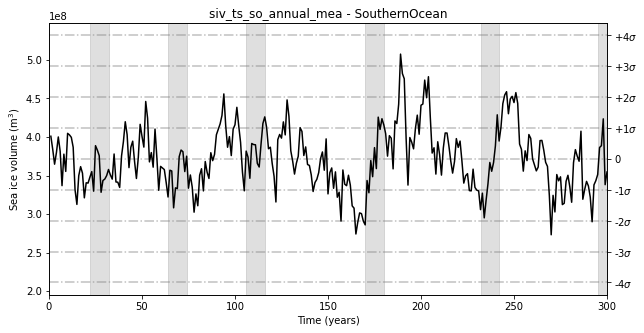

In [258]:
vis.stdev_plot(siv_so_annual_mean, 'SouthernOcean');

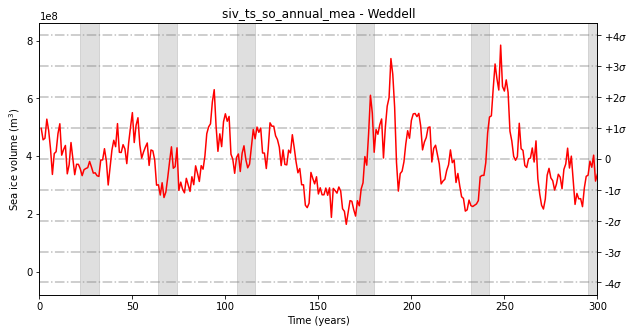

In [259]:
vis.stdev_plot(siv_so_annual_mean, 'Weddell');